### Programming Assignment 3 
# **Logicstic Regression**

AJ Dave A. Obis and Juan Francis C. Tuatis

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Load the data
# Define column names based on the dataset description
dataset_columns = [
    "ID", "Diagnosis", "Radius_Mean", "Texture_Mean", "Perimeter_Mean", "Area_Mean",
    "Smoothness_Mean", "Compactness_Mean", "Concavity_Mean", "Concave_Points_Mean",
    "Symmetry_Mean", "Fractal_Dimension_Mean", "Radius_SE", "Texture_SE", "Perimeter_SE",
    "Area_SE", "Smoothness_SE", "Compactness_SE", "Concavity_SE", "Concave_Points_SE",
    "Symmetry_SE", "Fractal_Dimension_SE", "Radius_Worst", "Texture_Worst", "Perimeter_Worst",
    "Area_Worst", "Smoothness_Worst", "Compactness_Worst", "Concavity_Worst", "Concave_Points_Worst",
    "Symmetry_Worst", "Fractal_Dimension_Worst"
]

# Read the data into a DataFrame
data = pd.read_csv("wdbc.data", header=None, names=dataset_columns)

### Data Pre-Processing

In [2]:
# remove rows with missing values
data.dropna(inplace=True)

# remove the column "Sample code number"
data.drop(columns=['ID'], inplace=True)

# replace "Class" values: 0 for benign, 1 for malignant
data["Diagnosis"] = data["Diagnosis"].map({"M": 1, "B": 0})

# Display the first few rows of the processed DataFrame
print(data)

     Diagnosis  Radius_Mean  Texture_Mean  Perimeter_Mean  Area_Mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     Smoothness_Mean  Compactness_Mean  Concavity_Mean  Concave_Points_Mean  \
0            0.11840           0.27760         0.30010  

# **General Guidelines**
## 1. Split the samples into 70% Training and 30% Testing at random.


In [3]:
# Define features (X) and labels (y)
X = data.iloc[:, 1:]  # All columns except "Diagnosis"
y = data.iloc[:, 0]  # "Diagnosis" column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training and Testing Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Training and Testing Split:
X_train: (398, 30), X_test: (171, 30)
y_train: (398,), y_test: (171,)


## 2. Use stratify=y in the test_train_split function. Build a pipeline using the Standard scaler and logistic regression.

In [4]:
# use stratify=y...
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# build a pipeline...
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])

## 3. Use the default penalty settings of Logistic Regression. 
As the penalty parameter is not modified in the LogisticRegression function, the default penalty settings are used.

## 4. After fitting the data, what is the model’s training and testing accuracy? Which features are most important?

In [5]:
# fitting the data
pipeline.fit(X_train, y_train)

# what is the model's training accuracy
y_train_pred = pipeline.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {training_accuracy:.2f}")

# what is the model's testing accuracy
y_pred = pipeline.predict(X_test)
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Which features are most important?
logreg_model = pipeline.named_steps['logreg']
feature_importance = np.abs(logreg_model.coef_[0])
feature_names = X.columns

# show in a df
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)
print("\nTop Features by Importance:")
print(importance_df.head(10))

Training Accuracy: 0.99
Testing Accuracy: 0.97

Top Features by Importance:
                Feature  Importance
21        Texture_Worst    1.384327
10            Radius_SE    1.205130
28       Symmetry_Worst    1.085744
13              Area_SE    0.912114
15       Compactness_SE    0.904630
23           Area_Worst    0.876082
7   Concave_Points_Mean    0.853924
20         Radius_Worst    0.845014
26      Concavity_Worst    0.832548
6        Concavity_Mean    0.805938


The top features according to the model highlights the importance of tumor characteristics associated with worst-case values and variability. Texture_Worst, Symmetry_Worst, and Radius_Worst are the most crucial characteristics, as extreme deviations in texture, form, and size are highly associated with malignancy.

## 5. Generate a confusion matrix, then calculate the other metrics: F1-score, Precision, Recall, and False alarm rate.

In [6]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# calculate the other metrics
TN, FP, FN, TP = conf_matrix.ravel()
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
false_alarm_rate = FP / (FP + TN) if (FP + TN) > 0 else 0

print(f"F1-Score: {f1_score:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"False Alarm Rate: {false_alarm_rate:.2f}")


Confusion Matrix:
[[106   1]
 [  4  60]]
F1-Score: 0.96
Precision: 0.98
Recall: 0.94
False Alarm Rate: 0.01


## 6. Plot the ROC curve and report the AUC. For this item, provide results separately for both the training and testing data.

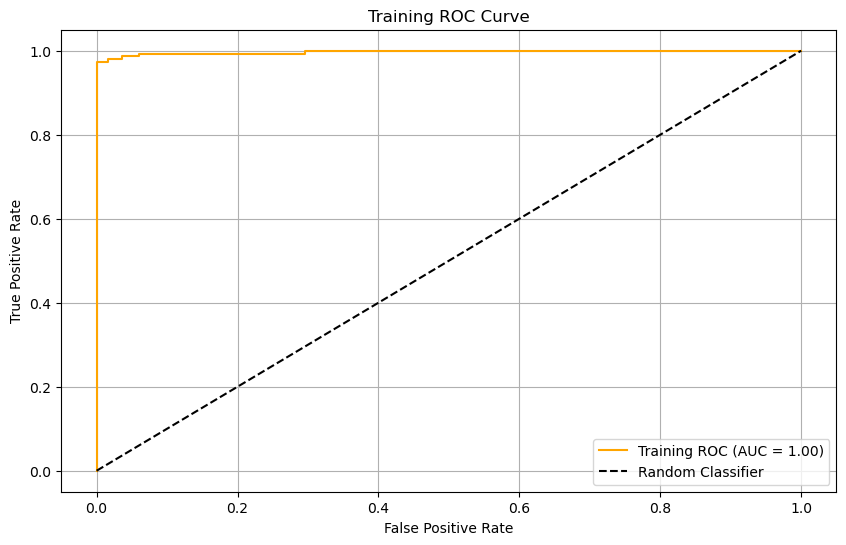

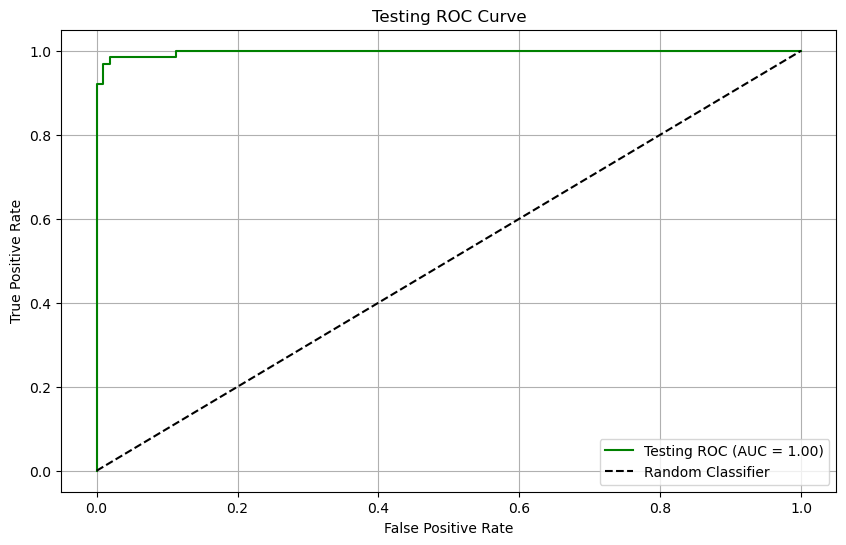


AUC Scores:
Training AUC: 0.99724
Testing AUC: 0.99752


In [7]:
# Plot ROC curve and report AUC
train_probs = pipeline.predict_proba(X_train)[:, 1]
test_probs = pipeline.predict_proba(X_test)[:, 1]

# Calculate ROC curves
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)

# Calculate AUC scores
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

# Plot Training ROC curve
plt.figure(figsize=(10, 6))
plt.plot(train_fpr, train_tpr, color='orange', label=f'Training ROC (AUC = {train_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Plot Testing ROC curve
plt.figure(figsize=(10, 6))
plt.plot(test_fpr, test_tpr, color='green', label=f'Testing ROC (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Testing ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

print("\nAUC Scores:")
print(f"Training AUC: {train_auc:.5f}")
print(f"Testing AUC: {test_auc:.5f}")

# Guide Questions 

## 1. What steps are required to remoce the "Sample code number" column?

## 2. How can the "Class" values be converted into binary (0 and 1) form in Python?

## 3. What is the importance of splitting the dataset in training and test sets?

##### Splitting the dataset into training and test sets avoids the model from being overly fitted or underdly fitted. This also avoids the model to become bias when similar data from the datasets were used to test its functionality, especially if the model turned out to be overly fitted. 
    

## 4. Why is it necessary to use the stratify parameter in the train_test_split function?

##### Stratify parameter ensures that the proportion of values in the sample produced will be the same as the proportion of values provided in the stratify parameter. This is useful when dealing with imbalanced datasets where the distribution of target labels is different in the training and test sets. 

## 5. What is logistic regeression, and why is it suitable for this dataset?

##### Logistic regression is a statistical model used for binary classification tasks. It is a linear model that predicts the probability of a binary outcome based on a set of independent variables. Since the dataset used has target lavels that are in binary (the malignant or benign), logistic regeression is suitable for it. Furthermore, the mode utilize a sigmoid function to map the predicted probabilities to the range of 0 to 1, which can be interpreted as the probability of the outcome being positive.

## 6. How can the training and testing accuracy of the logistic regression model be calculated?

##### Training accuracy is calculated by comparing the predicted labels of the training set with the actual labels. Both accuracy scores give an overall idea of how well the model performs on unseen data.

## 7. Which features in the dataset are most influential in determining the tumar status, and how can their imporatnce be assessed?

##### 

## 8. How is a confusion matrix generated, and what does it represent?

##### A confusion matrix is a table that summarizes the performance of a classification model. It shows the number of true positives, true negatives, false positives, and false negatives for each possible outcome. The diagonal elements in the matrix represent correct predictions, while the off-diagonal elements represent incorrect predictions.

## 9. How are precision, recall, F1-score, and false alarm rate calculated from the confusion matrix?

##### Precision is calculated as the ratio of true positives to the sum of true positives and false positives. It measures the accuracy of the positive predictions. Recall is calculated as the ratio of true positives to the sum of true positives and false negatives. It measures the proportion of actual positive cases that were correctly identified. F1-score is a harmonic mean of precision and recall, which gives a balanced measure of the model's performance.

## 10. Why are theses metrics important for evaluating the performance of a classifier?

##### These metrics are important for evaluating the performance of a classifier because they provide a comprehensive evaluation of the model's predictions. They help to understand the model's strengths, weaknesses, and areas for improvement. For example, a high precision value indicates that the model is correctly identifying positive cases, while a high recall value indicates that the model is correctly identifying all actual positive cases. F1-score and false alarm rate help to measure the model's overall performance and identify areas for improvement.